# <a href="#C1">Etude de Marché pour une Expansion à l'international

## Descriptif :
-  Une entreprise française d’agroalimentaire souhaite se développer à l'international.

## Objectifs : 
- Proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché. 
# 
- [Importer les librairies](#Importer-les-librairies)
- [Importer les données](#Importer-les-données)    
- [Sélection des colonnes pertinentes](#Sélection-des-colonnes-pertinentes)
- [Normaliser les données](#Normaliser-les-données)


## I) Classification par ascendance hiérarchique (CAH)
- a) [Dendrogramme](#Dendrogramme)
- b) [Composition des clusters - CAH](#Composition-des-clusters---CAH)
- c) [Catégorisation des Clusters obtenues par la CAH](#Catégorisation-des-Clusters-obtenues-par-la-CAH)  
    
    
## II) Clustering avec l'algorithme du k-means.
- a) [Méthode du coude et Coefficient de silhouette](#Méthode-du-coude-et-Coefficient-de-silhouette)
- b) [Appliquer le K-means](#Appliquer-le-K-means)
- c) [Composition des clusters - K-means](#Composition-des-clusters---K-means)
- d) [Catégorisation des Clusters obtenues par le K-means](#Catégorisation-des-Clusters-obtenues-par-le-K-means)

## III) Analyse en Composantes Principales (ACP or PCA)
- a) [Diagramme l’éboulis des valeurs propres](#Diagramme-l’éboulis-des-valeurs-propres)
- b) [Appliquer l'ACP](#Appliquer-l'ACP)
- c) [Simple Visualisation](#Simple-Visualisation)
- d) [Visualisation des centroids et des individus en 3D](#Visualisation-des-centroids-et-des-individus-en-3D)
- e) [Plans factoriels](#Plans-factoriels)
- f) [Cercle des corrélations (Correlation graph)](#Cercle-des-corrélations-/-Correlation-graph)
    
## III) Visualiser les Clusters sur une carte
- a) [Conversion des latitudes et longitudes en coordonnées cartésiennes (x,y)](#Conversion-des-latitudes-et-longitudes-en-coordonnées-cartésiennes-(x,y))
- b) [Jointure - CAH](#Jointure---CAH)
- c) [Jointure - K_means](#Jointure---K_means)
- d) [Comment sont répartis les pays au niveau continental ?](#Comment-sont-répartis-les-pays-au-niveau-continental-?)
- d) [Affichage des Clusters](#Affichage-des-Clusters)
    
## IV) [Conclusion](#Conclusion)

# Import les librairies

In [33]:
import pandas as pd
import numpy as np
# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
# SCALING - Normalisation
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
import warnings

# Importer les données

In [34]:
data = pd.read_csv("data_2019_VF.csv")
data.head()

,Zone,Accès eau potable,PIB par habitant,Prévalence_excès_pondéral_enfant_moins_de_5_ans,Stabilité politique,Utilisation services eau de base (%),Valeur importations alimentaires / exportations (%),Disponibilite_interieure_x1000T,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Revenu_National_Brut_Valeur_USD/habitant,Agriculture_Expenditure_Share,Agriculture_Value_Added_Share_of_GDP,Prevalence_Severe_Food_Insecurity,Prevalence_of_Undernourishment,Food_price_inflation_%,Agriculture_Value_Added_per_worker,Mean_weekly_hours_worked_per_employee_in_agriculture,Population_x1000,Distance_France_kms
0,Pays-Bas,99.00,56784.0,4.9,0.85,99.0,8.0,160.0,18.49,5.33,...,51354.368707,0.30,1.64,1.4,2.5,4.047987,73321.89,30.786667,17059.560,430.0
1,Afghanistan,26.80,2065.0,4.1,-2.66,72.4,281.0,69.0,6.29,1.80,...,508.479473,9.04,25.77,19.8,26.9,3.794770,1445.58,39.311667,37171.921,5593.0
2,Afrique du Sud,88.21,13710.0,12.9,-0.27,93.5,6.0,2178.0,149.63,37.20,...,6521.805919,1.24,1.96,7.5,6.3,3.548024,7262.23,44.263333,57792.518,9307.0
3,Albanie,70.70,13653.2,15.1,0.11,94.8,23.0,35.0,62.33,12.23,...,5289.094977,2.04,18.39,8.8,4.3,2.911840,5098.49,42.943333,2882.740,1604.0
4,Algérie,73.10,11522.0,12.9,-1.04,94.2,25.0,280.0,22.47,6.51,...,3930.661719,2.75,12.34,6.9,2.5,-0.517588,19435.43,39.311667,42228.408,1343.0


# Sélection des colonnes pertinentes

In [35]:
Colonnes_pertinentes = [
"Zone",
"Stabilité politique",
"Valeur importations alimentaires / exportations (%)",
"Exportations_Qte_x1000",
"Importations_Qte_x1000T",
"Production_x1000T",
"Revenu_National_Brut_Croissance_annuelle_USD/habitant_%",
"Agriculture_Expenditure_Share",
"Food_price_inflation_%",
"Population_x1000",
"Distance_France_kms"
]

data = data[Colonnes_pertinentes]
data = data.set_index("Zone")
data.head()

,Stabilité politique,Valeur importations alimentaires / exportations (%),Exportations_Qte_x1000,Importations_Qte_x1000T,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Agriculture_Expenditure_Share,Food_price_inflation_%,Population_x1000,Distance_France_kms
Zone,,,,,,,,,,
Pays-Bas,0.85,8.0,1493.0,602.0,1048.0,-2.513162,0.30,4.047987,17059.560,430.0
Afghanistan,-2.66,281.0,2.0,44.0,28.0,0.237607,9.04,3.794770,37171.921,5593.0
Afrique du Sud,-0.27,6.0,48.0,488.0,1816.0,-4.768209,1.24,3.548024,57792.518,9307.0
Albanie,0.11,23.0,0.0,22.0,13.0,0.520512,2.04,2.911840,2882.740,1604.0
Algérie,-1.04,25.0,1.0,0.0,285.0,-3.775633,2.75,-0.517588,42228.408,1343.0


# Normaliser les données

Le MinMaxScaler effectue une transformation linéaire des données en utilisant les valeurs minimales et maximales présentes dans les données d'origine. 
- Il redimensionne les données de sorte que la valeur minimale devienne 0 et la valeur maximale devienne 1.

In [36]:
# Création d'une instance
scaler = preprocessing.MinMaxScaler()
# Normalisation des données (mise à l'échelle entre 0 et 1)
data_scaled = scaler.fit_transform(data)

# I) Classification par ascendance hiérarchique (CAH)

In [37]:
data_CAH = data_scaled.copy()
# Conversion de l'array NumPy en DataFrame
pd.DataFrame(data_CAH)
# Calculer les distances en spécifiant la méthode à utiliser:
Z = linkage(data_CAH, method="ward")

## Dendrogramme

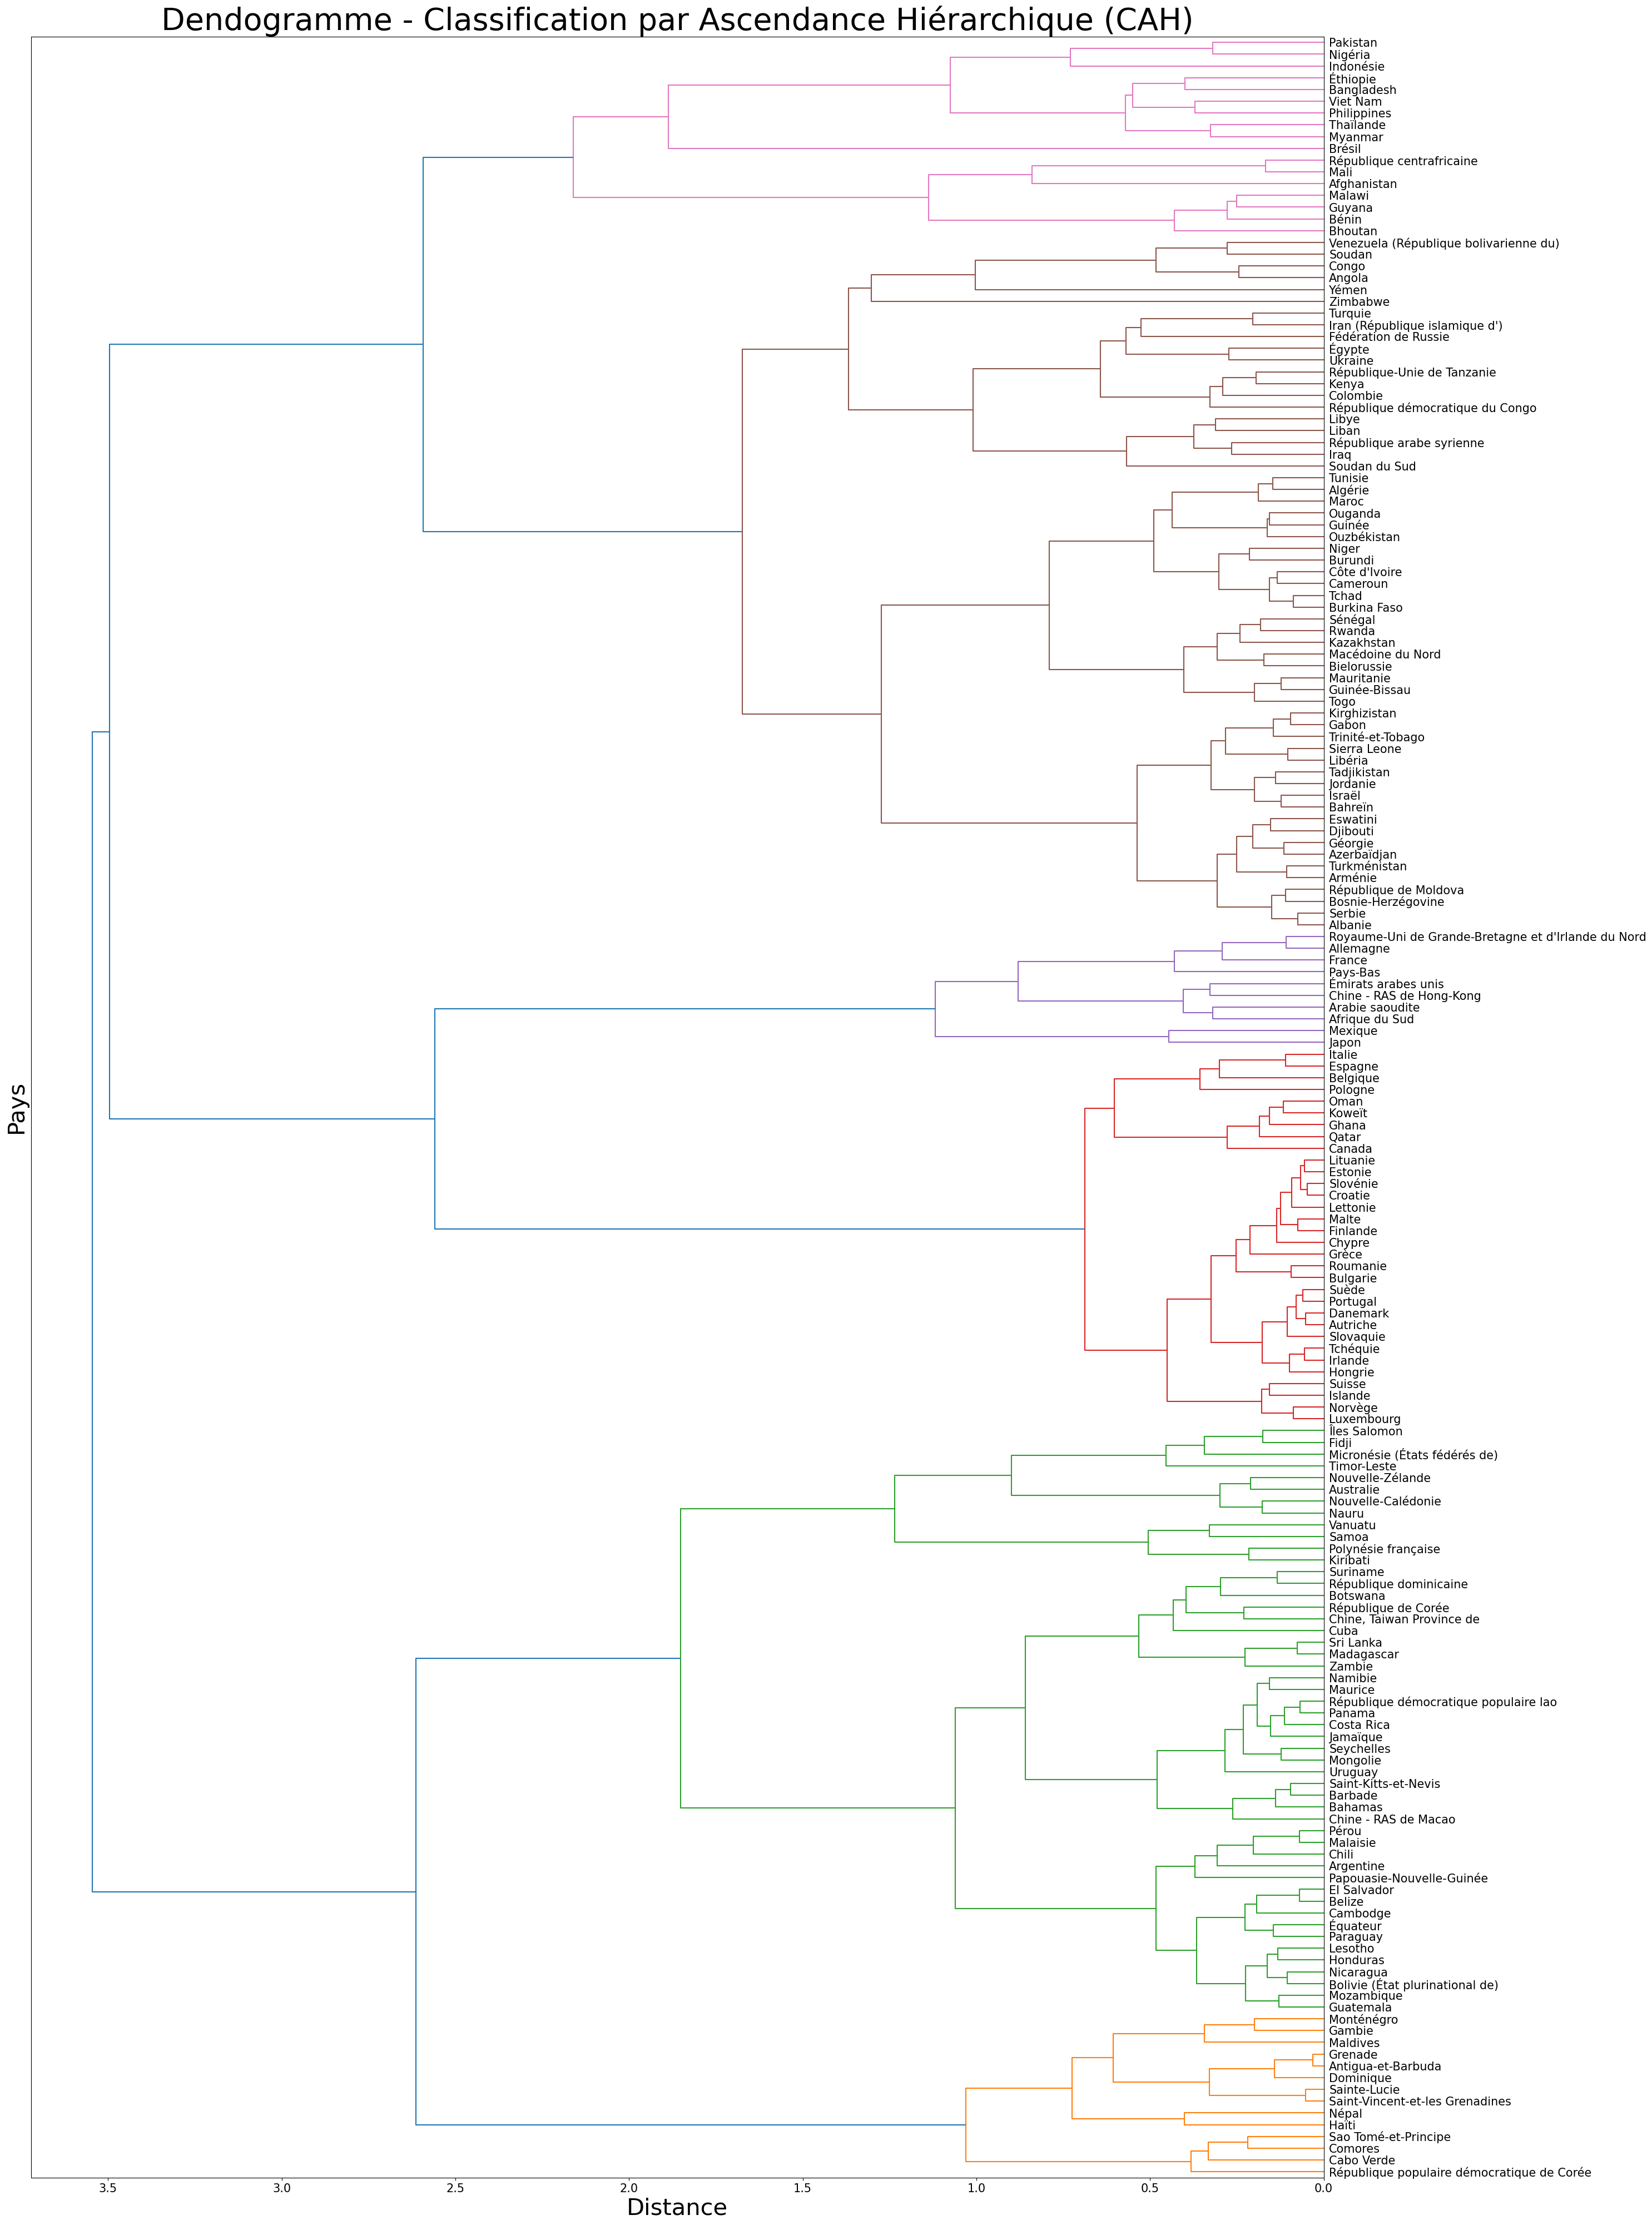

In [38]:
# Récupération des noms des pays (individus)
names = data.index

fig, ax = plt.subplots(1, 1, figsize=(30, 50))
# Tracer le dendogramme
dendogram = dendrogram(Z, ax=ax, labels=names, orientation="left")
# Paramétres graphiques
plt.title("Dendogramme - Classification par Ascendance Hiérarchique (CAH)", fontsize=40)
plt.xlabel("Distance", fontsize=30)
plt.ylabel("Pays", fontsize=30)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

# Sauvegarder le dendogramme en tant qu'image JPEG
plt.savefig('dendrogram.jpg', format='jpeg', dpi=500)
plt.show()

In [39]:
# On instancie un estimateur : 
cah = AgglomerativeClustering(n_clusters=6, linkage="ward")
# On entraine l'estimateur :
display(cah.fit(data_CAH))
# Assignation des Labels à la variable labels
labels_CAH = cah.labels_
# Conversion de l'array NumPy en DataFrame
data_CAH = pd.DataFrame(data_CAH)
# Ajout des labels au dataframe
data_CAH["cluster_CAH"] = labels_CAH
# Ajout des pays du fichier source
data_CAH.index = data.index
data_CAH.head()

AgglomerativeClustering(n_clusters=6)

,0,1,2,3,4,5,6,7,8,9,cluster_CAH
Zone,,,,,,,,,,,
Pays-Bas,0.820862,0.014368,0.364235,0.527145,0.074358,0.657614,0.015810,0.031958,0.063696,0.022657,2
Afghanistan,0.024943,0.798851,0.000488,0.038529,0.001987,0.693994,0.879447,0.031192,0.138838,0.294694,0
Afrique du Sud,0.566893,0.008621,0.011710,0.427320,0.128849,0.627790,0.108696,0.030446,0.215878,0.490384,2
Albanie,0.653061,0.057471,0.000000,0.019264,0.000922,0.697736,0.187747,0.028522,0.010730,0.084514,4
Algérie,0.392290,0.063218,0.000244,0.000000,0.020221,0.640917,0.257905,0.018152,0.157729,0.070762,4


## Composition des clusters - CAH

In [40]:
# Affichage des pays par clusters
for i in range(6):
    cluster_data = data_CAH[data_CAH.cluster_CAH == i]
    countries = cluster_data.index.tolist()
    num_countries = len(countries)
    print(f'Cluster {i}')
    print(f'Nombre de pays: {num_countries}')
    print(countries)
    print()

Cluster 0
Nombre de pays: 17
['Afghanistan', 'Bangladesh', 'Bhoutan', 'Brésil', 'Bénin', 'Guyana', 'Indonésie', 'Malawi', 'Mali', 'Myanmar', 'Nigéria', 'Pakistan', 'Philippines', 'République centrafricaine', 'Thaïlande', 'Viet Nam', 'Éthiopie']

Cluster 1
Nombre de pays: 50
['Argentine', 'Australie', 'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Botswana', 'Cambodge', 'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Costa Rica', 'Cuba', 'El Salvador', 'Fidji', 'Guatemala', 'Honduras', 'Jamaïque', 'Kiribati', 'Lesotho', 'Madagascar', 'Malaisie', 'Maurice', 'Micronésie (États fédérés de)', 'Mongolie', 'Mozambique', 'Namibie', 'Nauru', 'Nicaragua', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Panama', 'Papouasie-Nouvelle-Guinée', 'Paraguay', 'Polynésie française', 'Pérou', 'République de Corée', 'République dominicaine', 'République démocratique populaire lao', 'Saint-Kitts-et-Nevis', 'Samoa', 'Seychelles', 'Sri Lanka', 'Suriname', 'Timor-Leste', 'Uruguay

## Catégorisation des Clusters obtenues par la CAH

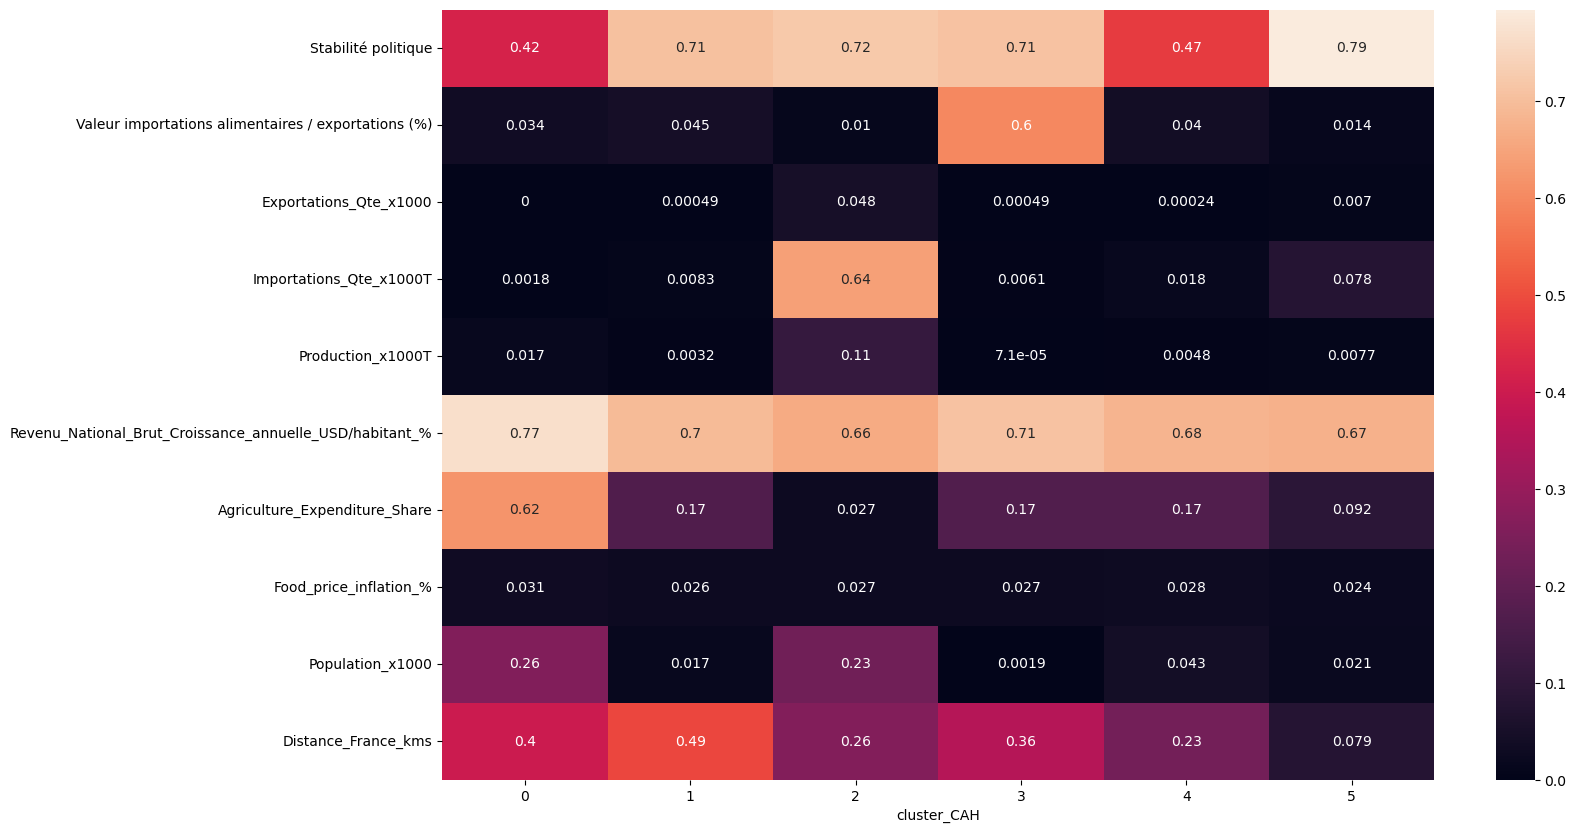

,Stabilité politique,Valeur importations alimentaires / exportations (%),Exportations_Qte_x1000,Importations_Qte_x1000T,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Agriculture_Expenditure_Share,Food_price_inflation_%,Population_x1000,Distance_France_kms
cluster_CAH,,,,,,,,,,
0,-0.92,15.0,0.0,2.0,240.0,5.90,6.40,3.79,69428.45,7572.0
1,0.35,18.5,2.0,9.5,44.5,0.33,1.81,2.23,4460.00,9303.5
2,0.42,6.5,198.0,731.0,1602.0,-2.13,0.41,2.27,61391.51,4969.0
3,0.36,210.5,2.0,7.0,1.0,1.48,1.85,2.43,529.73,6768.5
4,-0.69,17.0,1.0,21.0,67.0,-0.70,1.84,2.90,11565.20,4425.0
5,0.74,8.0,28.5,89.0,108.0,-1.22,1.07,1.40,5637.35,1501.0


In [41]:
# Heatmap
plt.figure(figsize=(16,10))
data_heatmap = data_CAH.groupby("cluster_CAH").median()
data_heatmap.columns = data.columns
sns.heatmap(data=data_heatmap.transpose(), annot=True)
plt.show()

data_CAH_results = data.copy()
data_CAH_results["cluster_CAH"] = labels_CAH
# Grouper par cluster en fonction de la médiane / variables
data_CAH_results = data_CAH_results.groupby(["cluster_CAH"]).median().round(2)
data_CAH_results

Cluster 0 :
- Instable politiquement
- forte croissance économique
- producteur de volailles (moins de 250.000 tonnes / an)
- investissement gouvernementaux dans l'Agriculture
- situé à plus de 7500 kms de la FRANCE

Cluster 1 :
- Stable politiquement
- Stagnation économique
- faible producteur de volailles (moins de 50.000 tonnes / an)
- moins de 2% du PIB investit dans l'agriculture
- très éloigné de la FRANCE, à plus de 9000 kms

Cluster 2 :
- Stable politiquement
- Récession économique
- Producteur de volailles (plus de 1.6 millions de tonnes / an)
- moins de 0.5% du PIB investit dans l'agriculture
- situé à 5000 kms de la FRANCE

Cluster 3 :
- Stable politiquement
- croissance économique
- Ne produit pas de volailles
- moins de 2% du PIB investit dans l'agriculture
- situé à plus de 6500 kms de la FRANCE

Cluster 4 :
- Instable politiquement
- Pas de croissance économique
- faible producteur de volailles (moins de 67.000 tonnes / an)
- moins de 2% du PIB investit dans l'agriculture
- situé à plus de 4000 kms de la FRANCE

Cluster 5 :
- Stable politiquement
- Récession économique
- faible producteur de volailles (moins de 108.000 tonnes / an)
- moins de 2% du PIB investit dans l'agriculture
- Proche de la FRANCE, situé à moins de 1500 kms de la FRANCE

# --------------------------------------------------

# Clustering avec l'algorithme du k-means.

## Normaliser les données 

In [42]:
# Les données ont déjà été normalisé - cf SCALING
data_KM = data_scaled.copy()

## *Combien de clusters avons-nous ?* 
## Méthode du coude et Coefficient de silhouette

[38.35330515153629,
 32.425100449887346,
 28.278301334287207,
 24.528551045233293,
 21.51812500026033,
 19.06418484636662,
 17.53243079819764,
 16.764979246163715,
 15.287933347276013]

Text(0, 0.5, 'Silhouette Score')

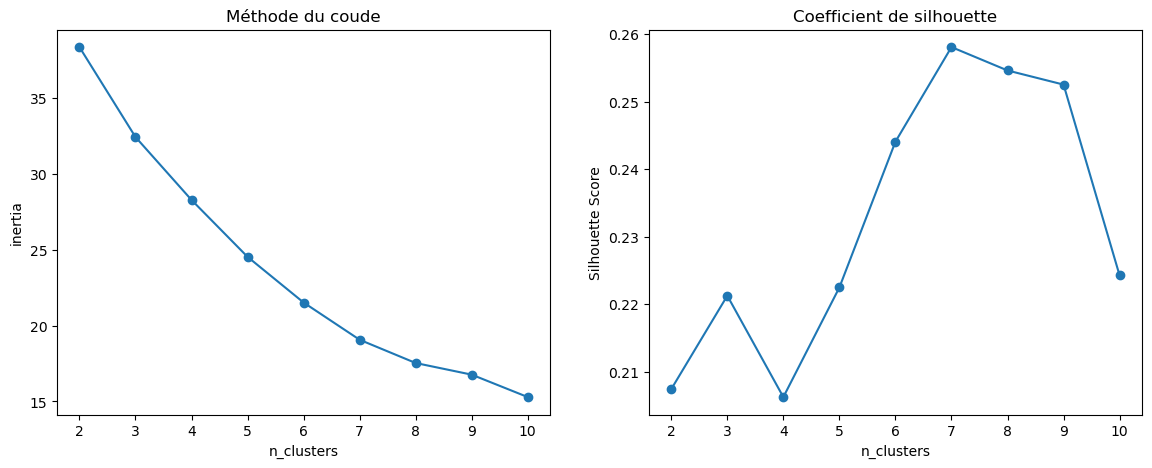

In [43]:
warnings.filterwarnings("ignore")
# On défini ensuite la liste du nombre de clusters que l'on veut tester:
k_list = range(2, 11)
# On défini d'abord une liste vide pour stocker nos inerties:
inertia = []
# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :
for i in k_list:
    kmeans = KMeans(n_clusters=i, 
                    init="k-means++", 
                    random_state = 42, 
                    n_init=15).fit(data_KM)
    inertia.append(kmeans.inertia_)

display(inertia)

# Graphique avec 2 plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Afficher la courbe du coude
axs[0].plot(range(2, 11), inertia, marker="o")
axs[0].set_title("Méthode du coude")
axs[0].set_xlabel("n_clusters")
axs[0].set_ylabel("inertia")

# Your code for calculating and plotting the silhouette scores
k_list2 = range(2, 11)
silhouettes = []
for i in k_list2:
    kmeans2 = cluster.KMeans(n_clusters = i, n_init=15, 
                             random_state = 42,  
                             init="k-means++"
                            )
    kmeans2.fit(data_KM)
    silh = metrics.silhouette_score(data_scaled, kmeans2.labels_)
    silhouettes.append(silh)

# Afficher le graphique du coefficient de silhouette
axs[1].plot(range(2, 11), silhouettes, marker="o")
axs[1].set_title("Coefficient de silhouette")
axs[1].set_xlabel("n_clusters")
axs[1].set_ylabel("Silhouette Score")

La variante "k-means++" du k-means va créer les centroïdes initiaux de sorte à les « éparpiller » le plus possible dans les données au lieu d'initialiser les clusters au hasard.

- La méthode du coude :
    - affiche un nombre de clusters à considérer de 7.
- Le coefficient de silhouette :
    - Le coefficient de silhouette croit avec le nombre de clusters et chute pour certains clusters. 
    - Plus le coefficient de silhouette est haut et mieux c'est !
    
Pour la suite, nous allons considérer 7 clusters pour comparer avec le dendogramme.

## Appliquer le K-means

In [44]:
# On part sur 7 clusters
kmeans = KMeans(n_clusters=7, n_init=15, random_state = 42,
                init="k-means++"
               )
kmeans.fit(data_KM)
# Affecter les cluster à la varialbe labels
labels = kmeans.labels_
# Affecter les centroides à la varialbe centroids
centroids = kmeans.cluster_centers_
# Conversion de l'array NumPy en DataFrame
data_KM = pd.DataFrame(data_KM)
# Ajouter les labels à notre dataframe data_KM
data_KM["cluster_KM"] = labels

## Composition des clusters - K-means

In [45]:
# Affichage des pays par clusters
for i in range(7):
    cluster_data_KM = data_KM[data_KM.cluster_KM == i]
    countries = cluster_data_KM.index.tolist()
    num_countries = len(countries)
    print(f'Cluster {i}')
    print(f'Nombre de pays: {num_countries}')
    print(countries)
    print()

Cluster 0
Nombre de pays: 44
[9, 11, 14, 17, 19, 21, 23, 31, 34, 36, 37, 42, 49, 53, 62, 68, 77, 85, 94, 96, 100, 103, 104, 106, 108, 109, 114, 115, 121, 122, 123, 128, 135, 137, 139, 141, 142, 148, 156, 165, 170, 171, 179, 181]

Cluster 1
Nombre de pays: 52
[3, 6, 10, 12, 15, 18, 22, 25, 33, 38, 43, 46, 47, 50, 51, 52, 54, 57, 59, 61, 66, 69, 73, 74, 75, 76, 79, 82, 84, 86, 89, 90, 91, 98, 99, 105, 113, 117, 125, 127, 129, 130, 136, 147, 149, 150, 151, 155, 157, 159, 161, 167]

Cluster 2
Nombre de pays: 7
[16, 24, 56, 70, 112, 120, 124]

Cluster 3
Nombre de pays: 31
[4, 13, 26, 27, 32, 39, 41, 45, 63, 67, 71, 72, 81, 87, 88, 110, 111, 118, 133, 138, 152, 153, 160, 166, 168, 169, 172, 174, 176, 177, 180]

Cluster 4
Nombre de pays: 14
[7, 30, 40, 48, 58, 60, 83, 116, 126, 140, 143, 144, 145, 146]

Cluster 5
Nombre de pays: 10
[0, 2, 5, 8, 35, 55, 78, 102, 131, 178]

Cluster 6
Nombre de pays: 24
[1, 20, 28, 29, 44, 64, 65, 80, 92, 93, 95, 97, 101, 107, 119, 132, 134, 154, 158, 162, 163, 

## Catégorisation des Clusters obtenues par le K-means

In [46]:
data_KM_results = data.copy()
data_KM_results["cluster_KM"] = labels
# Grouper par cluster en fonction de la médiane / variables
data_KM_results = data_KM_results.groupby(["cluster_KM"]).median().round(2)
data_KM_results

,Stabilité politique,Valeur importations alimentaires / exportations (%),Exportations_Qte_x1000,Importations_Qte_x1000T,Production_x1000T,Revenu_National_Brut_Croissance_annuelle_USD/habitant_%,Agriculture_Expenditure_Share,Food_price_inflation_%,Population_x1000,Distance_France_kms
cluster_KM,,,,,,,,,,
0,0.35,16.0,2.0,9.5,46.5,0.76,1.68,2.23,3813.08,9129.5
1,0.45,9.5,8.5,48.5,68.0,-0.09,1.10,2.47,5487.80,1838.5
2,-0.92,11.0,2.0,5.0,1523.0,6.23,2.83,5.56,195874.68,7921.0
3,-1.34,16.0,2.0,7.0,112.0,-2.78,2.36,4.58,25069.23,4608.0
4,0.89,243.0,2.0,6.5,1.0,1.44,1.85,1.79,203.58,6973.0
5,0.42,6.5,198.0,731.0,1602.0,-2.13,0.41,2.27,61391.51,4969.0
6,-0.26,23.0,1.0,8.0,46.5,0.23,5.37,2.71,14078.15,5912.0


Cluster 0 :
- Stable politiquement
- Stagnation économique
- faible production de volailles (moins de 50.000 tonnes / an)
- investissement gouvernementaux dans l'Agriculture inférieur à 2% du PIB
- très éloigné de la FRANCE, à plus de 9000 kms

Cluster 1 :
- Stable politiquement
- Stagnation économique
- faible producteur de volailles (moins de 70.000 tonnes / an)
- moins de 2% du PIB investit dans l'agriculture
- Proche de la FRANCE, situé à moins de 2000 kms de la FRANCE

Cluster 2 :
- Instable politiquement
- Forte croissane économique
- Producteur de volailles (plus de 1.5 millions de tonnes / an)
- plus de 2% du PIB investit dans l'agriculture
- Forte population
- Loin de la FRANCE, situé à 8000 kms

Cluster 3 :
- Très instable politiquement
- Récession économique
- faible production de volailles (moins de 120.000 tonnes / an)
- plus de 2% du PIB investit dans l'agriculture
- situé à moins de 5000 kms de la FRANCE

Cluster 4 :
- Stable politiquement
- Croissance économique
- Ne produit pas de volailles
- moins de 2% du PIB investit dans l'agriculture
- faible population
- situé à plus de 7000 kms de la FRANCE

Cluster 5 :
- Stable politiquement
- Récession économique
- Producteur de volailles (plus de 1.5 millions de tonnes / an)
- moins de 2% du PIB investit dans l'agriculture
- situé à moins de 6000 kms de la FRANCE

Cluster 6 :
- Stable politiquement
- Stagnation économique
- faible production de volailles (moins de 50.000 tonnes / an)
- investissement gouvernementaux dans l'Agriculture supérieur à 5% du PIB
- situé à moins de 5000 kms de la FRANCE

# ---------------------------------------------------

# Analyse en Composantes Principales (ACP or PCA)

Le nombre maximal de composantes d'une ACP est le minimum entre p et n-1 (ici n = 182 et p = 10). 
- Ainsi, le nombre maximal de composantes pour cette ACP est de 10.
- Pour faire l'ACP, il faut instancier puis entrainer nos données sur la base du nombre de variables (p).
  - cette étape a déjà été réalisé au paragraphe **Normaliser les données** (*début du notebook*). 

In [47]:
# Normaliser les données - ACP
data_ACP = data_scaled.copy()
# Choix du nombre de composantes à calculer
pca = PCA(n_components=10)
pca.fit(data_ACP)

PCA(n_components=10)

Le nombre de composantes étant élévee, nous devons déterminer **combien de composantes analyser ?**

En ACP, on projette les données sur les axes principaux d’inertie, eux-mêmes ordonnés selon l’inertie du nuage projeté : de la plus grande à la plus petite. Quand on additionne les inerties associées à tous les axes, on obtient l’inertie totale du nuage des individus. 
- On peut donc afficher le Diagramme relatif aux **éboulis des valeurs propres** qui décrit le pourcentage d’inertie totale associé à chaque axe.

## Diagramme l’éboulis des valeurs propres

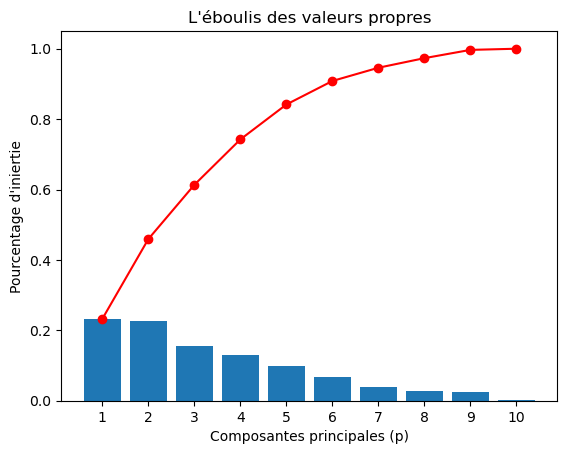

array([0.2326343 , 0.45931416, 0.61344289, 0.74238126, 0.84159324,
       0.90838561, 0.94598464, 0.97323667, 0.99669773, 1.        ])

In [48]:
# Calcul de la somme cumulée des valeurs propres
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
# Calcul de la Somme totale des valeurs propres
total_sum = np.sum(pca.explained_variance_ratio_)
# Calcul de la variance cumulée : 
variance_cumulee = pca.explained_variance_ratio_.cumsum()

# Eboulis des valeurs propres
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
# Tracer la droite cumulée
plt.plot(np.arange(1, len(variance_cumulee) + 1), variance_cumulee, "r-", marker="o")
plt.xlabel("Composantes principales (p)")
plt.ylabel("Pourcentage d'iniertie")
plt.title("L'éboulis des valeurs propres")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

variance_cumulee

Le diagramme obtenu décrit le pourcentage d’inertie totale associé à chaque axe (composantes). Ainsi, on constate que :
- 4 composantes représente 74% de l'inertie totale.
- 5 composantes représente 84% de l'inertie totale.
- 6 composantes représente 90% de l'inertie totale.

Nous allons donc appliquer l'ACP sur 5 composantes puisque celles-ci suffisent à expliquer 84% de l'information.

## Appliquer l'ACP

In [49]:
# On instancie sur le nombres de composantes voulues
pca = PCA(n_components=5).fit(data_ACP)
# Projection des données
data_ACP_proj = pca.transform(data_ACP)
# Créer un DataFrame relatif aux données : 
data_ACP_proj = pd.DataFrame(data_ACP_proj, columns = ["F1", "F2", "F3", "F4", "F5"], index=data.index)
display(data_ACP_proj.head())
# Projection des centroides
centroids_proj = pca.transform(centroids)
# Créer un DataFrame relatif aux centroides :
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4", "F5"], 
                              index=["cluster_0", "cluster_1", "cluster_2","cluster_3",
                                     "cluster_4", "cluster_5", "cluster_6"])

,F1,F2,F3,F4,F5
Zone,,,,,
Pays-Bas,-0.407429,-0.368962,0.047957,0.080782,0.306379
Afghanistan,0.874333,0.361940,-0.377014,0.237465,0.352077
Afrique du Sud,-0.049666,-0.135578,0.347116,0.139805,0.063642
Albanie,-0.101319,-0.123353,-0.199419,-0.085850,-0.002257
Algérie,0.171865,-0.229285,-0.186777,0.004176,-0.018548


## Simple Visualisation

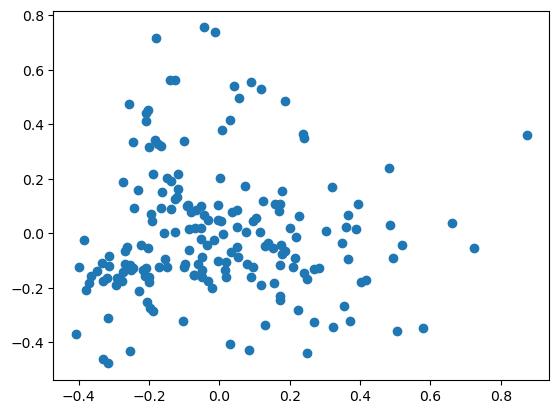

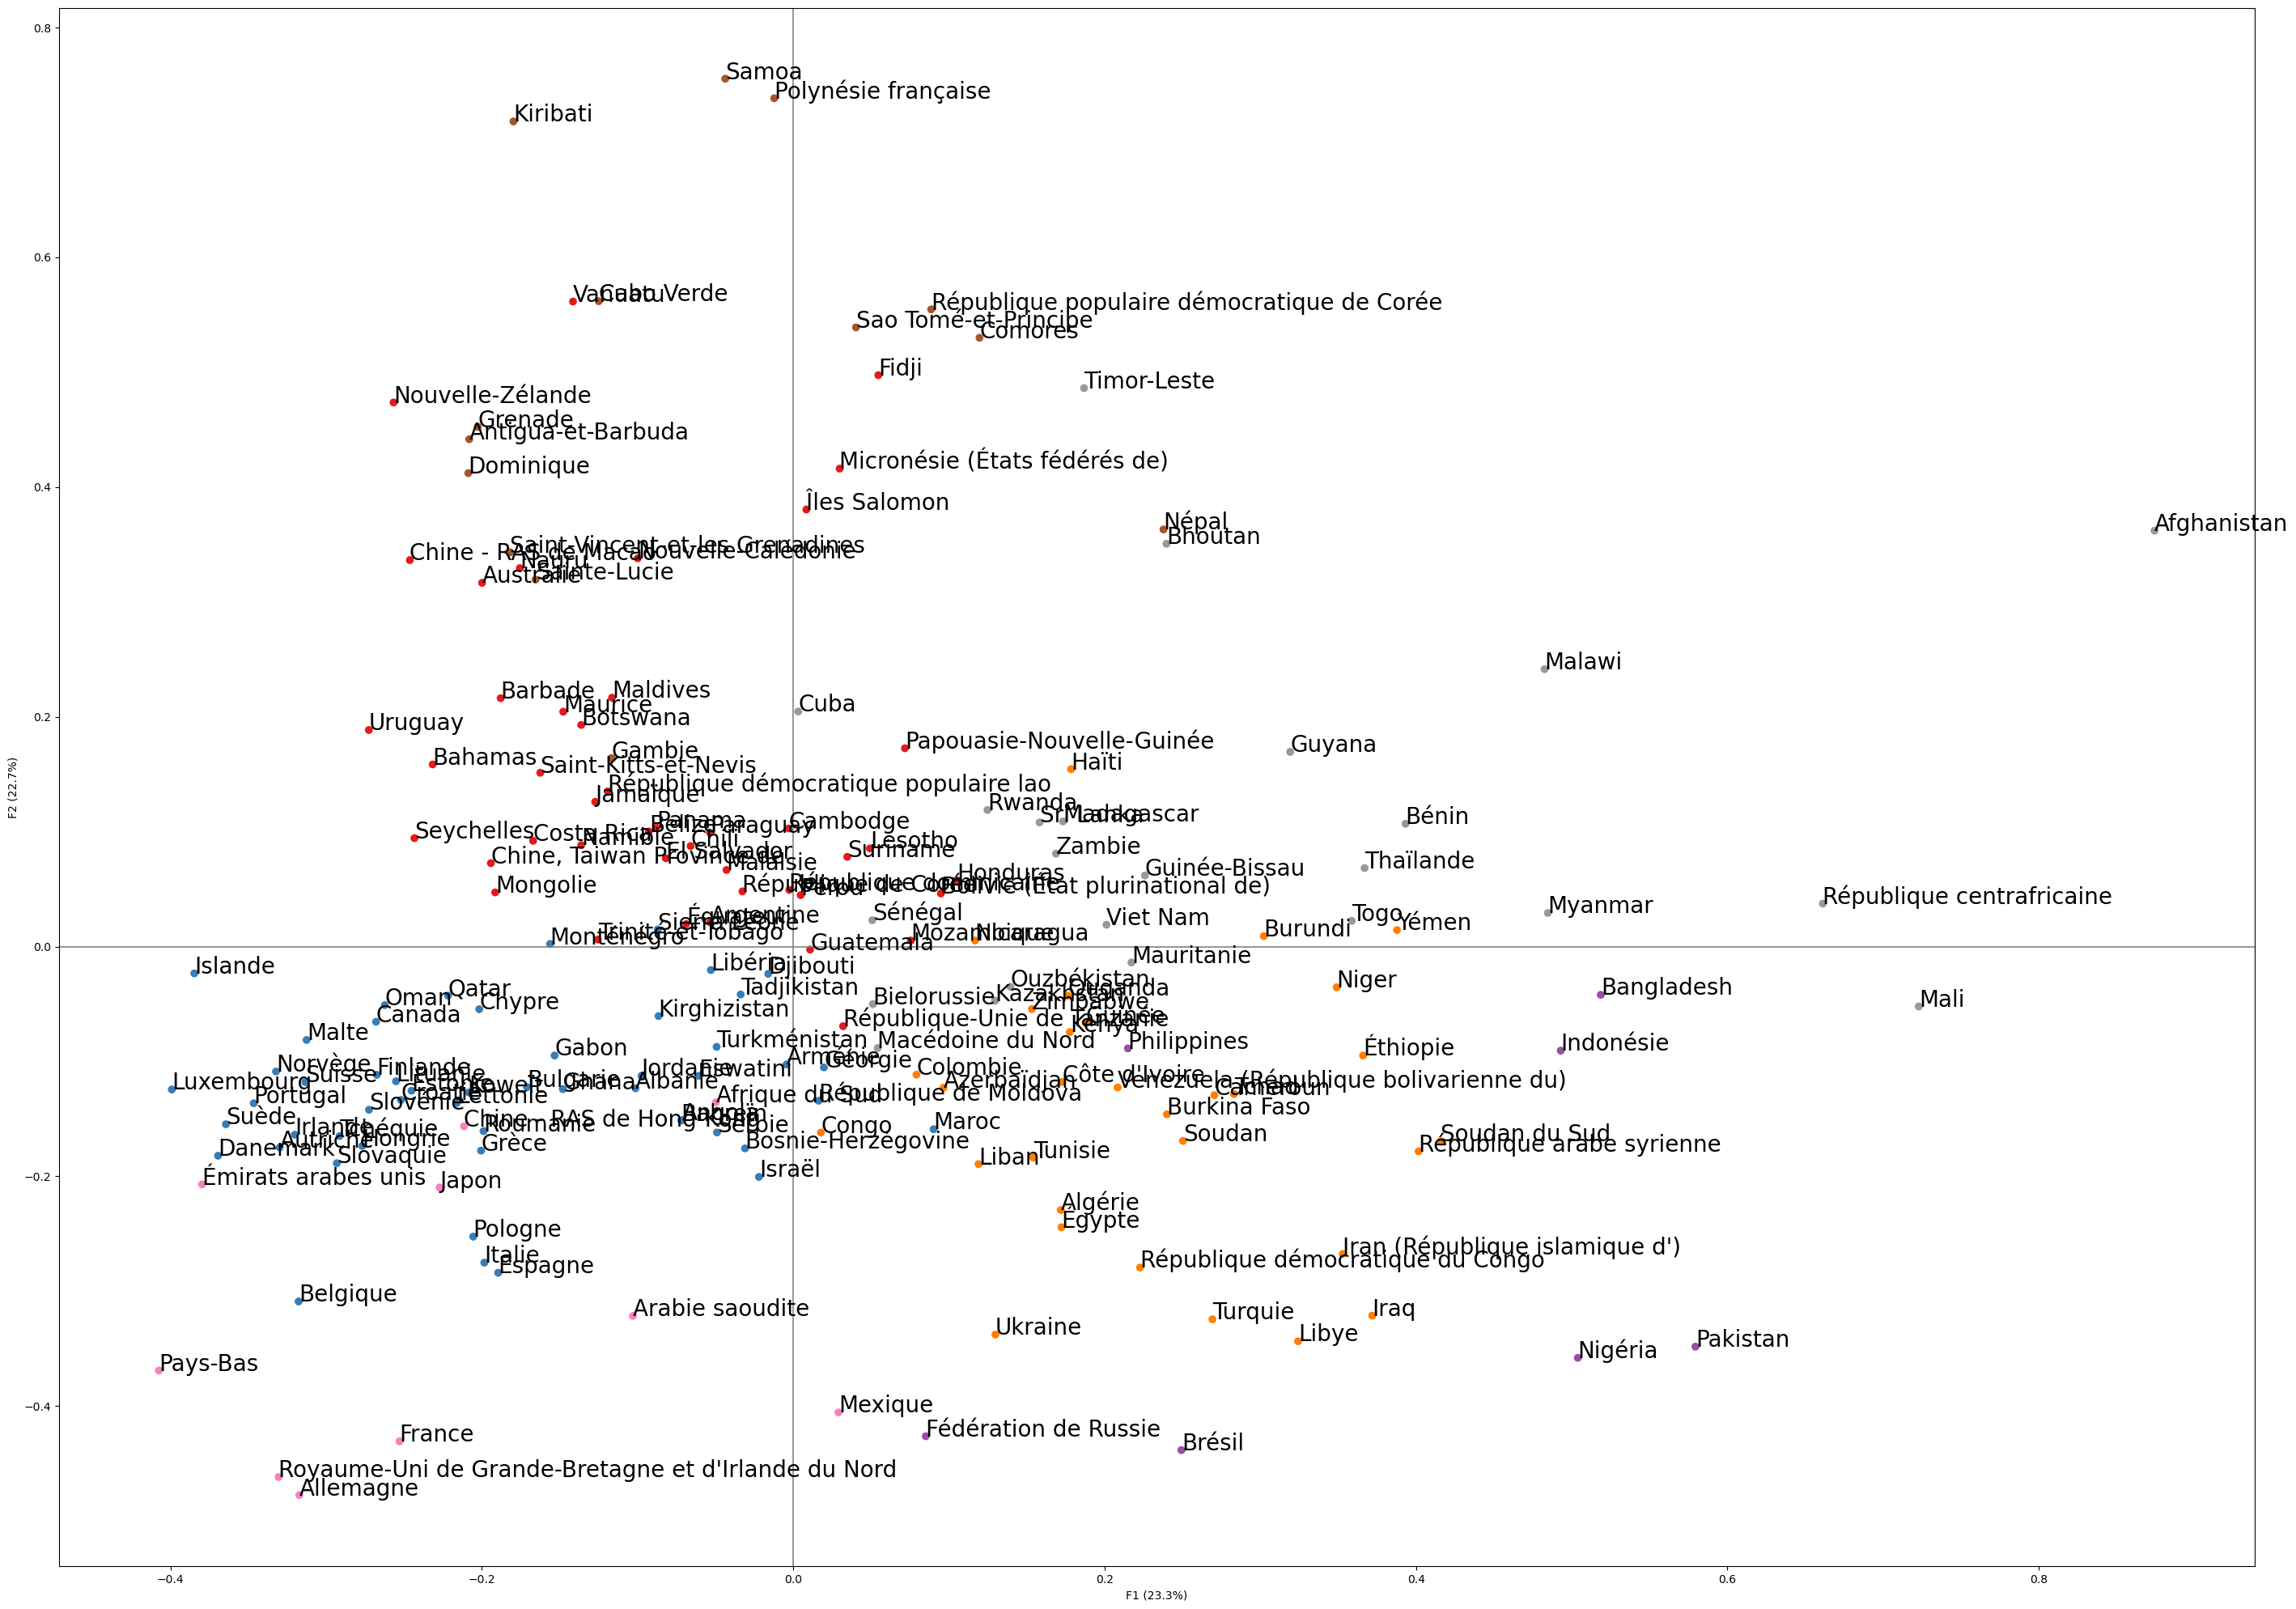

In [50]:
# 1er plot
plt.scatter(data_ACP_proj.iloc[:, 0], data_ACP_proj.iloc[:, 1])

# 2ème plot avec les noms des pays
fig, ax = plt.subplots(figsize=(35, 25))

X_ = np.array(data_ACP_proj)
scatter = ax.scatter(X_[:, 0], X_[:, 1], c=labels, cmap="Set1")

# On enregistre nos axes x, y
x, y = 0, 1
# On enregistre les labels x et y avec la variance cumulée (%)
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x], 1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y], 1)))
# On limite nos axes x, y
x_max = np.abs(X_[:, x]).max() * 1.1
y_max = np.abs(X_[:, y]).max() * 1.1
# Afficher les lignes horizontales et verticales
ax.axhline(0, color='grey', alpha=0.8)  # Ligne Horizontal a y=0
ax.axvline(0, color='grey', alpha=0.8)  # Ligne Vertical a x=0

# Afficher les labels
for i, (x, y) in enumerate(zip(data_ACP_proj.iloc[:, 0], data_ACP_proj.iloc[:, 1])):
    plt.text(x, y, data.index[i], fontsize=20)
plt.show()

## Visualisation des centroids et des individus en 3D

Pour l'instant intéressons nous aux centroides. Nous allons afficher les points mais en les mettant en transparence grace au parametre `alpha`. 
Ensuite, nous allons afficher en carré noir les centroids grace au parametre `marker` et `c` : 

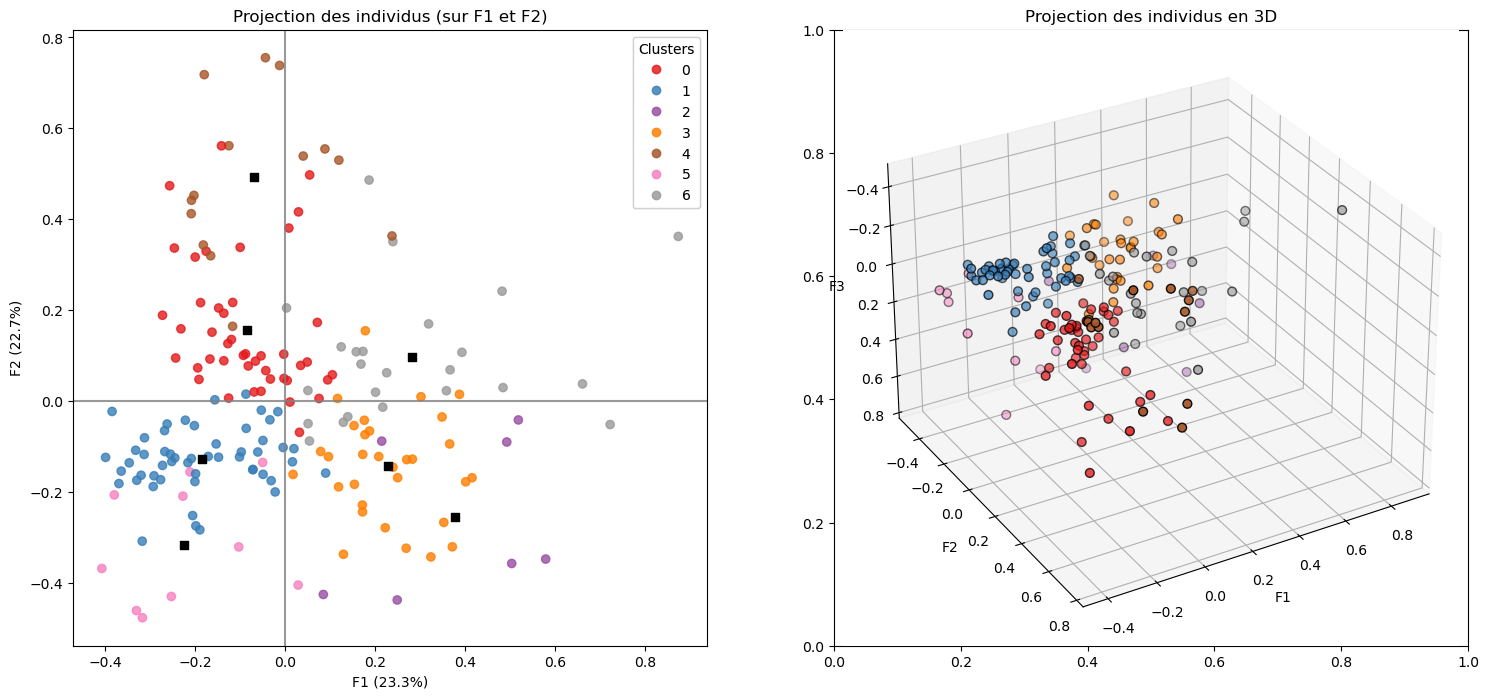

In [51]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

#Transforme notre DataFrame d'origine
X_ = np.array(data_ACP_proj)

# On enregistre nos axes x, y  / index 0 = F1 et index 1 = F2
x, y = axis = (0,1 )


# plus besoin d'utiliser iloc
scatter = ax[0].scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1", alpha=0.8)
scatter_centroid = ax[0].scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# nom des axes, avec le pourcentage d'inertie expliqué (variance expliquée)
ax[0].set_xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
ax[0].set_ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
# valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1

# affichage des lignes horizontales et verticales
ax[0].axhline(0, color='grey', alpha=0.8)  # ligne horizontale a y=0
ax[0].axvline(0, color='grey', alpha=0.8)  # ligne verticale a x=0

# Ajout d'un titre
ax[0].set_title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )

# Afficher la legende
legend = ax[0].legend(*scatter.legend_elements(), title="Clusters")
ax[0].add_artist(legend)

# ---------------------------------------------------------------------------

# 2ème plot
ax[1] = fig.add_subplot(122, projection="3d", elev=210, azim=-60)
ax[1].scatter(
    data_ACP_proj.iloc[:, 0],
    data_ACP_proj.iloc[:, 1],
    data_ACP_proj.iloc[:, 2],
    c=labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40)

ax[1].set_title("Projection des individus en 3D")
ax[1].set_xlabel("F1")
ax[1].set_ylabel("F2")
ax[1].set_zlabel("F3")
plt.show()

# Avec PLOTLY
import plotly.express as px
fig = px.scatter_3d(x=data_ACP_proj.iloc[:, 0], y=data_ACP_proj.iloc[:, 1], z=data_ACP_proj.iloc[:, 2], color=labels, 
                    # text=data_ACP_proj.index
                   )
fig.update_traces(textposition='top center', textfont=dict(size=8))

## Plans factoriels

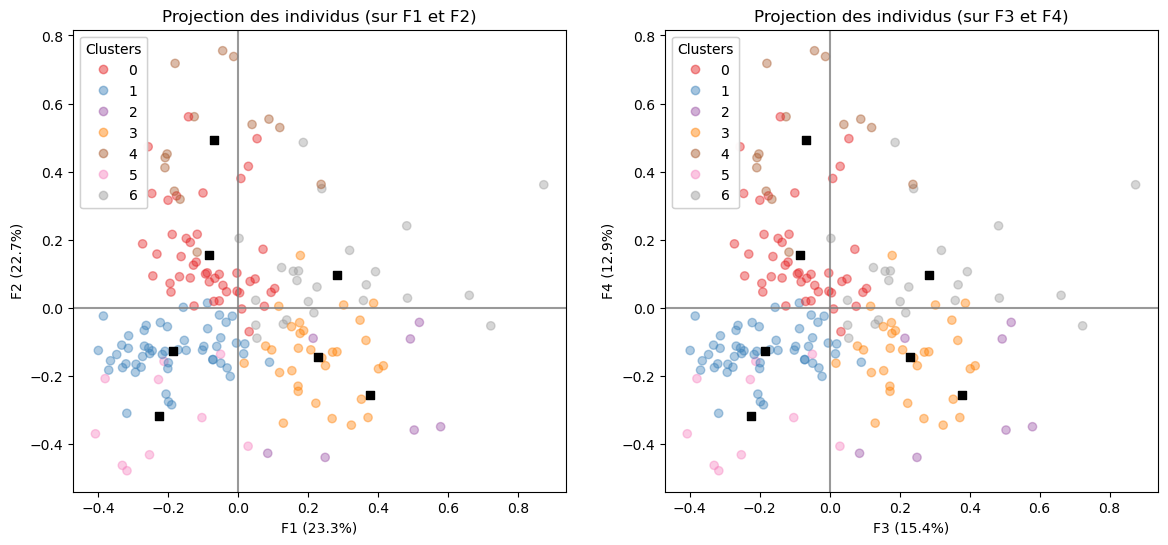

In [52]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

#Transforme notre DataFrame d'origine
X_ = np.array(data_ACP_proj)

# On enregistre nos axes x, y  / index 0 = F1 et index 1 = F2
x, y = axis = (0,1 )
# On enregistre nos axes x2, y2  / index 2 = F3 et index 3 = F4
x2, y2 = axis2 = (2,3 )

# plus besoin d'utiliser iloc
scatter = ax[0].scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1", alpha=0.4)
scatter2 = ax[1].scatter(X_[:, 0], X_[:, 1], c= labels, cmap="Set1", alpha=0.4)
scatter_centroid = ax[0].scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )
scatter_centroid2 = ax[1].scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# nom des axes, avec le pourcentage d'inertie expliqué (variance expliquée)
ax[0].set_xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
ax[0].set_ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
ax[1].set_xlabel('F{} ({}%)'.format(x2+1, round(100*pca.explained_variance_ratio_[x2],1)))
ax[1].set_ylabel('F{} ({}%)'.format(y2+1, round(100*pca.explained_variance_ratio_[y2],1)))
# valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1
# valeur x2 max et y2 max
x_max2 = np.abs(X_[:, x2]).max() *1.1
y_max2 = np.abs(X_[:, y2]).max() *1.1

# affichage des lignes horizontales et verticales
ax[0].axhline(0, color='grey', alpha=0.8)  # ligne horizontale a y=0
ax[0].axvline(0, color='grey', alpha=0.8)  # ligne verticale a x=0
ax[1].axhline(0, color='grey', alpha=0.8)  # ligne horizontale a y=0
ax[1].axvline(0, color='grey', alpha=0.8)  # ligne verticale a x=0

# Ajout d'un titre
ax[0].set_title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
ax[1].set_title("Projection des individus (sur F{} et F{})".format(x2+1, y2+1), )

# Afficher la legende
legend = ax[0].legend(*scatter.legend_elements(), title="Clusters")
ax[0].add_artist(legend)
legend = ax[1].legend(*scatter2.legend_elements(), title="Clusters")
ax[1].add_artist(legend)

- Le premier plan factoriel F1/F2 représente 46% de l'inertie totale
- Le 2ème plan factoriel F3/F4 représente 28.3% de l'inertie totale.

Nous pouvons donc conclure que les plans factoriels ci-dessus représentent 74.3% de l'inertie totale de nos données. Autrement dit, 5 composantes suffisent à clusteriser les pays avec 84%.

## Cercle des corrélations / Correlation graph

Nous allons afficher 2 plans factoriels :
- F1 / F2
- F3 / F4

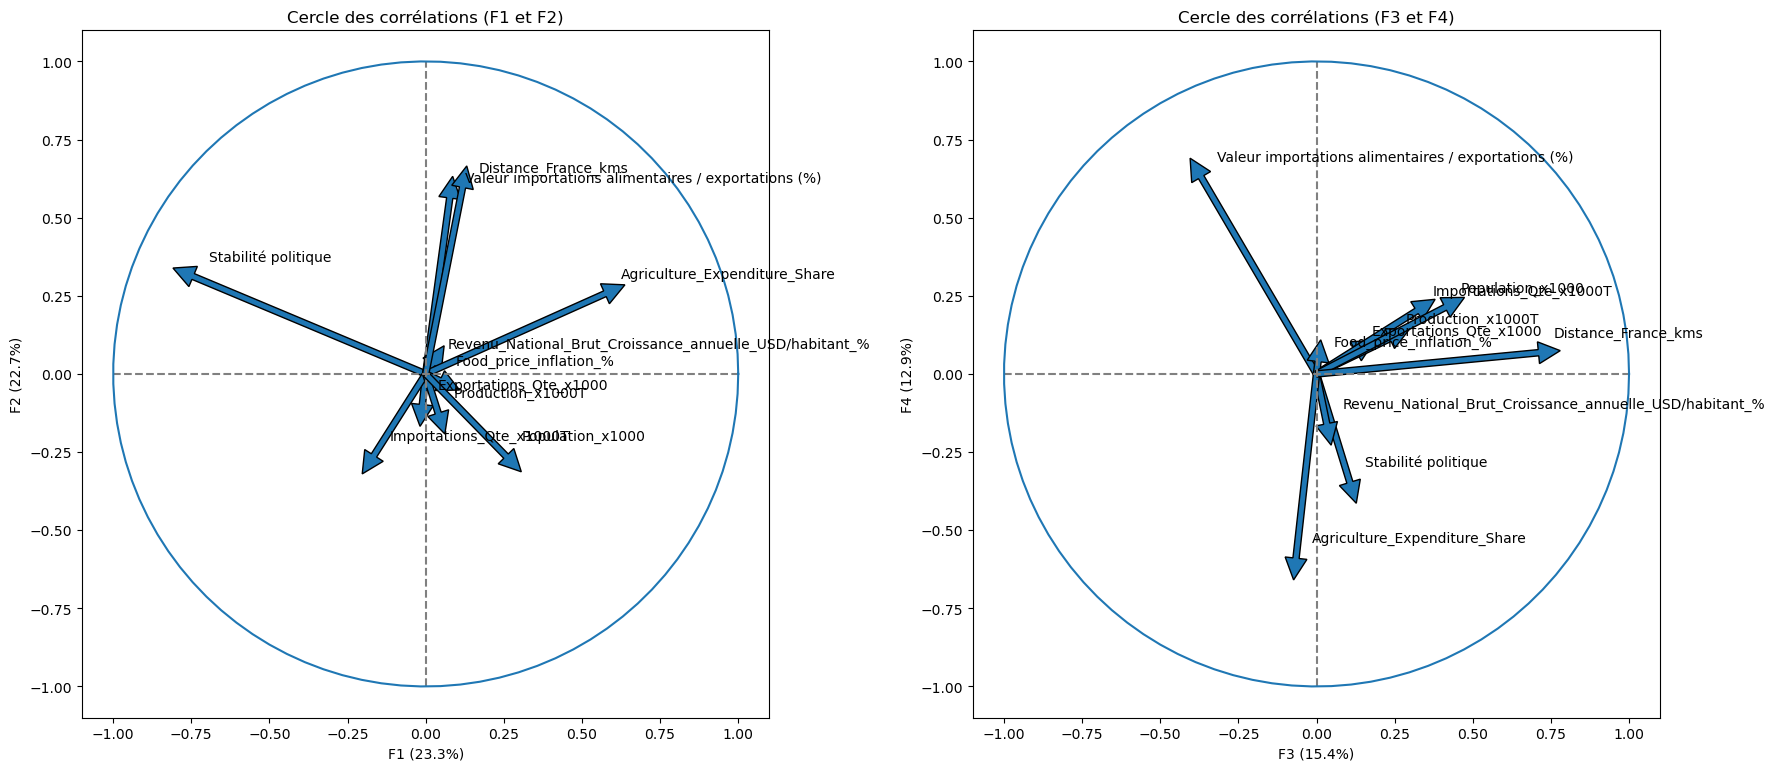

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# On définit nos 2 axes x, y (Plan factoriel F1 / F2)
x1, y1 = 0, 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'aspect': 'equal'})

# Plot 1
for i in range(0, pca.components_.shape[1]):
    ax1.arrow(0,
              0,
              pca.components_[x1, i],
              pca.components_[y1, i],
              head_width=0.07, head_length=0.07, width=0.02)

    ax1.text(pca.components_[x1, i] + 0.05, pca.components_[y1, i] + 0.05, data.columns[i])

ax1.plot([-1, 1], [0, 0], color='grey', ls='--')
ax1.plot([0, 0], [-1, 1], color='grey', ls='--')

ax1.set_xlabel('F{} ({}%)'.format(x1 + 1, round(100 * pca.explained_variance_ratio_[x1], 1)))
ax1.set_ylabel('F{} ({}%)'.format(y1 + 1, round(100 * pca.explained_variance_ratio_[y1], 1)))
ax1.set_title("Cercle des corrélations (F{} et F{})".format(x1 + 1, y1 + 1))

an = np.linspace(0, 2 * np.pi, 100)
ax1.plot(np.cos(an), np.sin(an))

# On définit nos 2 axes x, y (Plan factoriel F3 / F4)
x2, y2 = 2, 3

# Plot 2
for i in range(0, pca.components_.shape[1]):
    ax2.arrow(0,
              0,
              pca.components_[x2, i],
              pca.components_[y2, i],
              head_width=0.07, head_length=0.07, width=0.02)

    ax2.text(pca.components_[x2, i] + 0.05, pca.components_[y2, i] + 0.05, data.columns[i])

ax2.plot([-1, 1], [0, 0], color='grey', ls='--')
ax2.plot([0, 0], [-1, 1], color='grey', ls='--')

ax2.set_xlabel('F{} ({}%)'.format(x2 + 1, round(100 * pca.explained_variance_ratio_[x2], 1)))
ax2.set_ylabel('F{} ({}%)'.format(y2 + 1, round(100 * pca.explained_variance_ratio_[y2], 1)))
ax2.set_title("Cercle des corrélations (F{} et F{})".format(x2 + 1, y2 + 1))

ax2.plot(np.cos(an), np.sin(an))

plt.tight_layout()
plt.show()


Les 4 composantes principales du Plan Factoriel F1 / F2 sont :
  - Agriculture Expenditure Share
  - Distance par rapport à la FRANCE (fortement corrélée à F2)
  - Valeur importations alimentaires / exportations (fortement corrélée à F2)
  - Stabilité politique

Le cercle des corrélations relatif au plan factoriel F3/F4 montrent :
  - Agriculture Expenditure Share (fortement corrélée négativement à F4)
  - Distance par rapport à la FRANCE (fortement corrélée à F3)
  - Valeur importations alimentaires / exportations
  - Stabilité politique

# Visualiser les Clusters sur une carte
## Import du fichier Region

In [54]:
# Import du fichier avec les coordonnées (latitude, longitude)
Region_lat_long_capital = pd.read_excel("Region_lat_long_capital.xlsx")
# Afficher le fichier
display(Region_lat_long_capital.shape)
Region_lat_long_capital.head()

(214, 6)

,Pays,City,latitude,longitude,Country,Continent
0,Afghanistan,Kabul,34.5328,69.1658,Afghanistan,Asia
1,Afrique du Sud,Cape Town,-33.9250,18.4250,South Africa,Africa
2,Albanie,Tirana,41.3300,19.8200,Albania,Europe
3,Algérie,Algiers,36.7764,3.0586,Algeria,Africa
4,Allemagne,Berlin,52.5167,13.3833,Germany,Europe


## Conversion des latitudes et longitudes en coordonnées cartésiennes (x,y)

In [55]:
# Conversion des latitudes et longitudes en coordonnées cartésiennes (x,y)
import geopandas as gpd
Region_lat_long_capital = gpd.GeoDataFrame(Region_lat_long_capital, geometry = gpd.points_from_xy(Region_lat_long_capital.latitude, Region_lat_long_capital.longitude))
display(Region_lat_long_capital.head())
display(data_CAH.shape)

,Pays,City,latitude,longitude,Country,Continent,geometry
0,Afghanistan,Kabul,34.5328,69.1658,Afghanistan,Asia,POINT (34.53280 69.16580)
1,Afrique du Sud,Cape Town,-33.9250,18.4250,South Africa,Africa,POINT (-33.92500 18.42500)
2,Albanie,Tirana,41.3300,19.8200,Albania,Europe,POINT (41.33000 19.82000)
3,Algérie,Algiers,36.7764,3.0586,Algeria,Africa,POINT (36.77640 3.05860)
4,Allemagne,Berlin,52.5167,13.3833,Germany,Europe,POINT (52.51670 13.38330)


(182, 11)

## Jointure CAH

In [56]:
# Homogéniser les colonnes
Region_lat_long_capital.rename(columns={"Pays":"Zone"},inplace=True)
# Jointure
data_clusters_CAH = pd.merge(data_CAH, Region_lat_long_capital, how="left", on="Zone", indicator=True)
display(data_clusters_CAH["_merge"].value_counts())
data_clusters_CAH[data_clusters_CAH["_merge"]=="left_only"]["Zone"].unique()
# Prise en compte de la jointure compléte uniquement
data_clusters_CAH = data_clusters_CAH[data_clusters_CAH["_merge"]=="both"]
# Sélection des colonnes pertinentes
data_clusters_CAH = data_clusters_CAH[["Zone","City","latitude","longitude","Country","Continent","geometry","cluster_CAH"]]

both          182
left_only       0
right_only      0
Name: _merge, dtype: int64

##  Jointure  K-means

In [57]:
# Ajout des index du fichier source
data_KM.index = data.index
display("data_KM :" + str(data_KM.shape))
# Jointure
data_clusters_KM = pd.merge(data_KM, Region_lat_long_capital, how="left", on="Zone", indicator=True)
display(data_clusters_KM["_merge"].value_counts())
data_clusters_KM[data_clusters_KM["_merge"]=="left_only"]["Zone"].unique()
# Sélection des colonnes pertinentes
data_clusters_KM = data_clusters_KM[["Zone","City","latitude","longitude","Country","Continent","geometry","cluster_KM"]]

'data_KM :(182, 11)'

both          182
left_only       0
right_only      0
Name: _merge, dtype: int64

##  Comment sont répartis les pays au niveau continental ?

In [58]:
# Créer un dictionnaire pour stocker les résultats
results_CAH = {}
# Boucle sur les clusters
for cluster in range(6):
    cluster_counts = data_clusters_CAH[data_clusters_CAH["cluster_CAH"] == cluster]["Continent"].value_counts()
    results_CAH[f"cluster_CAH {cluster}"] = cluster_counts
# Créer un dataframe à partir du dictionnaire de résultats et transposer le dataframe
cluster_continent_CAH = pd.DataFrame(results_CAH).transpose()
# Afficher le dataframe
print(cluster_continent_CAH)
print("")

# ------------------------------------------------------------------------------
# Créer un dictionnaire pour stocker les résultats
results_KM = {}
# Boucle sur les clusters
for cluster in range(7):
    cluster_counts = data_clusters_CAH[data_clusters_KM["cluster_KM"] == cluster]["Continent"].value_counts()
    results_KM[f"cluster_KM {cluster}"] = cluster_counts

# Créer un dataframe à partir du dictionnaire de résultats et transposer le dataframe
cluster_continent_KM = pd.DataFrame(results_KM).transpose()
# Afficher le dataframe
print(cluster_continent_KM)

               Africa  Asia  Europe  North America  Oceania  South America
cluster_CAH 0     6.0   9.0     NaN            NaN      NaN            2.0
cluster_CAH 1     8.0  11.0     NaN           10.0     10.0           11.0
cluster_CAH 2     1.0   4.0     4.0            1.0      NaN            NaN
cluster_CAH 3     4.0   3.0     1.0            2.0      NaN            4.0
cluster_CAH 4    31.0  17.0     8.0            NaN      NaN            3.0
cluster_CAH 5     2.0   3.0    26.0            1.0      NaN            NaN

              Africa  Asia  Europe  North America  Oceania  South America
cluster_KM 0     7.0  11.0     NaN            8.0      6.0           12.0
cluster_KM 1     9.0  11.0    31.0            1.0      NaN            NaN
cluster_KM 2     1.0   4.0     1.0            NaN      NaN            1.0
cluster_KM 3    19.0   7.0     1.0            2.0      NaN            2.0
cluster_KM 4     4.0   2.0     NaN            1.0      3.0            4.0
cluster_KM 5     1.0   4.0    

In [59]:
data_clusters_CAH.dtypes
# Passage des clusters en format texte pour afficher la légende de la carte
data_clusters_CAH["cluster_CAH"] = data_clusters_CAH["cluster_CAH"].astype(str)
data_clusters_KM["cluster_KM"] = data_clusters_KM["cluster_KM"].astype(str)

In [60]:
data_clusters_CAH['cluster_CAH'].unique()

array(['2', '0', '4', '3', '1', '5'], dtype=object)

## Affichage des Clusters

In [61]:
# Tri des clusters de façon à afficher la légende dans l'ordre
data_clusters_CAH.sort_values("cluster_CAH", inplace=True)
data_clusters_KM.sort_values("cluster_KM", inplace=True)
# --------------------------------------------------------------------
# Création des Cartes
import plotly.express as px
# Create a color map for clusters
color_map = {'0': 'purple', '1': 'green', '2': 'orange', '3': 'gold', '4': 'turquoise', '5': 'blue', '6' : 'red'}

# Create the choropleth map
fig = px.choropleth(data_clusters_CAH, 
                    locationmode="country names",
                    locations=data_clusters_CAH["Country"],
                    scope="world",
                    color=data_clusters_CAH["cluster_CAH"],
                    color_discrete_map=color_map,  # Use the color map for cluster colors
                    title="Clustering - Classification ascendante hiérarchique (CAH)")

# Customize the layout
fig.update_layout(title_x=0.5, title_font=dict(color="blue"), legend=dict(x=0.3, y=-0.1, orientation='h'))
fig.show()
# ----------------------------------------------

# Create the choropleth map
fig = px.choropleth(data_clusters_KM, 
                    locationmode="country names",
                    locations=data_clusters_KM["Country"],
                    scope="world",
                    color=data_clusters_KM["cluster_KM"],
                    color_discrete_map=color_map,  # Use the color map for cluster colors
                    title="Clustering - K-means")

# Customize the layout
fig.update_layout(title_x=0.5, title_font=dict(color="blue"), legend=dict(x=0.3, y=-0.1, orientation='h'))

In [62]:
for i in range(7):
    print(f'Cluster {i}')
    print(data_KM[data_KM["cluster_KM"] == i].index.tolist())
    print()

Cluster 0
['Argentine', 'Australie', 'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Botswana', 'Cambodge', 'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Costa Rica', 'El Salvador', 'Fidji', 'Guatemala', 'Honduras', 'Jamaïque', 'Lesotho', 'Malaisie', 'Maldives', 'Maurice', 'Micronésie (États fédérés de)', 'Mongolie', 'Mozambique', 'Namibie', 'Nauru', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Panama', 'Papouasie-Nouvelle-Guinée', 'Paraguay', 'Pérou', 'République de Corée', 'République dominicaine', 'République démocratique populaire lao', 'République-Unie de Tanzanie', 'Saint-Kitts-et-Nevis', 'Seychelles', 'Suriname', 'Trinité-et-Tobago', 'Uruguay', 'Vanuatu', 'Équateur', 'Îles Salomon']

Cluster 1
['Albanie', 'Angola', 'Arménie', 'Autriche', 'Bahreïn', 'Belgique', 'Bosnie-Herzégovine', 'Bulgarie', 'Canada', 'Chypre', 'Croatie', 'Danemark', 'Djibouti', 'Espagne', 'Estonie', 'Eswatini', 'Finlande', 'Gabon', 'Ghana', 'Grèce', 'Géorgie', 'Hongrie', 'Ir

# Conclusion

Les deux méthodes de clustering fournissent des résultats similaire d'un point de vue macro. En effet, quelques pays différent en fonction de la méthode utilisé mais dans l'ensemble nous pouvons catégoriser les clusters en répondant aux questions ci-dessous :
- 1) Sont-ils Stable politiquement ?
- 2) Sont-ils en croissance économique ?
- 3) Sont-ils producteurs, importateurs ou au contraire exportateurs de volailles ?
- 4) Quelle est leur distance par rapport à la FRANCE ?
- 5) Taille de la populations ? 
        - *Une forte population indique également un plus grand marché à conquérir.*

Sur la base de ces 5 questions, nous pouvons éliminer les clusters :
- 2 et 3 car trop instable politiquement.
- 0 car trop éloignés par rapport à la FRANCE
    
**<font color="red">-- **ATTENTION--**</font>** : il faut garder à l'esprit que nous avons supprimer de notre analyse 3 pays importants :
- la Chine, 
- l'Inde,
- les États-Unis d'Amérique

In [63]:
# Sélection des clusters pertinents
data_clusters_KM = data_clusters_KM.loc[data_clusters_KM["cluster_KM"].isin(["1","4","5","6"])]

# Create the choropleth map
color_map = {'0': 'purple', '1': 'turquoise', '2': 'orange', '3': 'red', '4': 'red', '5': 'blue', '6' : 'orange'}
fig = px.choropleth(data_clusters_KM, 
                    locationmode="country names",
                    locations=data_clusters_KM["Country"],
                    scope="world",
                    color=data_clusters_KM["cluster_KM"],
                    color_discrete_map=color_map,  # Use the color map for cluster colors
                    title="Conclusion")

# Customize the layout
fig.update_layout(title_x=0.5, title_font=dict(color="blue"), legend=dict(x=0.3, y=-0.1, orientation='h'))

In [64]:
# Liste des pays
for i in range(7):
    if i in [1, 4, 5, 6]:
        print(f'Cluster {i}')
        print(data_KM[data_KM["cluster_KM"] == i].index.tolist())
        print()

Cluster 1
['Albanie', 'Angola', 'Arménie', 'Autriche', 'Bahreïn', 'Belgique', 'Bosnie-Herzégovine', 'Bulgarie', 'Canada', 'Chypre', 'Croatie', 'Danemark', 'Djibouti', 'Espagne', 'Estonie', 'Eswatini', 'Finlande', 'Gabon', 'Ghana', 'Grèce', 'Géorgie', 'Hongrie', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jordanie', 'Kirghizistan', 'Koweït', 'Lettonie', 'Libéria', 'Lituanie', 'Luxembourg', 'Malte', 'Maroc', 'Monténégro', 'Norvège', 'Oman', 'Pologne', 'Portugal', 'Qatar', 'Roumanie', 'République de Moldova', 'Serbie', 'Sierra Leone', 'Slovaquie', 'Slovénie', 'Suisse', 'Suède', 'Tadjikistan', 'Tchéquie', 'Turkménistan']

Cluster 4
['Antigua-et-Barbuda', 'Cabo Verde', 'Comores', 'Dominique', 'Gambie', 'Grenade', 'Kiribati', 'Népal', 'Polynésie française', 'République populaire démocratique de Corée', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Sao Tomé-et-Principe']

Cluster 5
['Pays-Bas', 'Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France

# [ALLER EN HAUT](#P9_Etude-de-marché-pour-se-développer-à-l'international)